In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime

In [33]:
df=pd.read_csv('Total.csv',index_col=False,)
del df['Unnamed: 0']
df['Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M:%S')
df['DateTime']=pd.to_datetime(df['Date'] + ' ' + df['Time'])
df


,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Date,DateTime
0,00:00:00,79,75,89,3,6,0 mph,29.88,0.0 in,2022-11-05,2022-11-05 00:00:00
1,00:30:00,77,75,94,1,6,0 mph,29.88,0.0 in,2022-11-05,2022-11-05 00:30:00
2,01:00:00,77,75,94,1,6,0 mph,29.88,0.0 in,2022-11-05,2022-11-05 01:00:00
3,01:30:00,77,75,94,1,5,0 mph,29.85,0.0 in,2022-11-05,2022-11-05 01:30:00
4,02:00:00,75,75,100,1,6,0 mph,29.85,0.0 in,2022-11-05,2022-11-05 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...
4573,21:30:00,81,77,89,14,1,0 mph,29.73,0.0 in,2022-08-02,2022-08-02 21:30:00
4574,22:00:00,81,77,89,13,3,0 mph,29.76,0.0 in,2022-08-02,2022-08-02 22:00:00
4575,22:30:00,81,77,89,13,5,0 mph,29.76,0.0 in,2022-08-02,2022-08-02 22:30:00
4576,23:00:00,81,77,89,13,6,0 mph,29.76,0.0 in,2022-08-02,2022-08-02 23:00:00


In [35]:
# df['DateTime'] = pd.to_datetime(df['DateTime']).dt.strftime('%Y-%M-%D %H:%M:%S')
del df['Time']
del df['Date']

In [37]:
df.dtypes

Temperature             int64
Dew Point               int64
Humidity                int64
Wind                    int64
Wind Speed              int64
Wind Gust              object
Pressure              float64
Precip.                object
DateTime       datetime64[ns]
dtype: object

In [38]:
df

,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,DateTime
0,79,75,89,3,6,0 mph,29.88,0.0 in,2022-11-05 00:00:00
1,77,75,94,1,6,0 mph,29.88,0.0 in,2022-11-05 00:30:00
2,77,75,94,1,6,0 mph,29.88,0.0 in,2022-11-05 01:00:00
3,77,75,94,1,5,0 mph,29.85,0.0 in,2022-11-05 01:30:00
4,75,75,100,1,6,0 mph,29.85,0.0 in,2022-11-05 02:00:00
...,...,...,...,...,...,...,...,...,...
4573,81,77,89,14,1,0 mph,29.73,0.0 in,2022-08-02 21:30:00
4574,81,77,89,13,3,0 mph,29.76,0.0 in,2022-08-02 22:00:00
4575,81,77,89,13,5,0 mph,29.76,0.0 in,2022-08-02 22:30:00
4576,81,77,89,13,6,0 mph,29.76,0.0 in,2022-08-02 23:00:00


In [40]:
df=df.set_index('DateTime')

In [42]:
df=df.sort_index()

In [103]:
tem_df=df[['Temperature']]
# tem_df.isnull().sum()

In [104]:
print(tem_df.notnull().count())

Temperature    4578
dtype: int64


In [105]:
tem_df

,Temperature
DateTime,
2022-08-02 00:00:00,81
2022-08-02 00:30:00,81
2022-08-02 01:00:00,81
2022-08-02 01:30:00,81
2022-08-02 02:00:00,81
...,...
2022-11-05 10:00:00,86
2022-11-05 10:30:00,86
2022-11-05 11:00:00,88


In [106]:
tem_df.values

array([[81],
       [81],
       [81],
       ...,
       [88],
       [88],
       [90]], dtype=int64)

In [107]:
#Chuyển sang độ C
tem_df['Temperature']=round((tem_df['Temperature']-32)*5/9,1)

C:\Users\Vungo\AppData\Local\Temp\ipykernel_3972\2020197651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tem_df['Temperature']=round((tem_df['Temperature']-32)*5/9,1)


In [108]:
tem_df

,Temperature
DateTime,
2022-08-02 00:00:00,27.2
2022-08-02 00:30:00,27.2
2022-08-02 01:00:00,27.2
2022-08-02 01:30:00,27.2
2022-08-02 02:00:00,27.2
...,...
2022-11-05 10:00:00,30.0
2022-11-05 10:30:00,30.0
2022-11-05 11:00:00,31.1


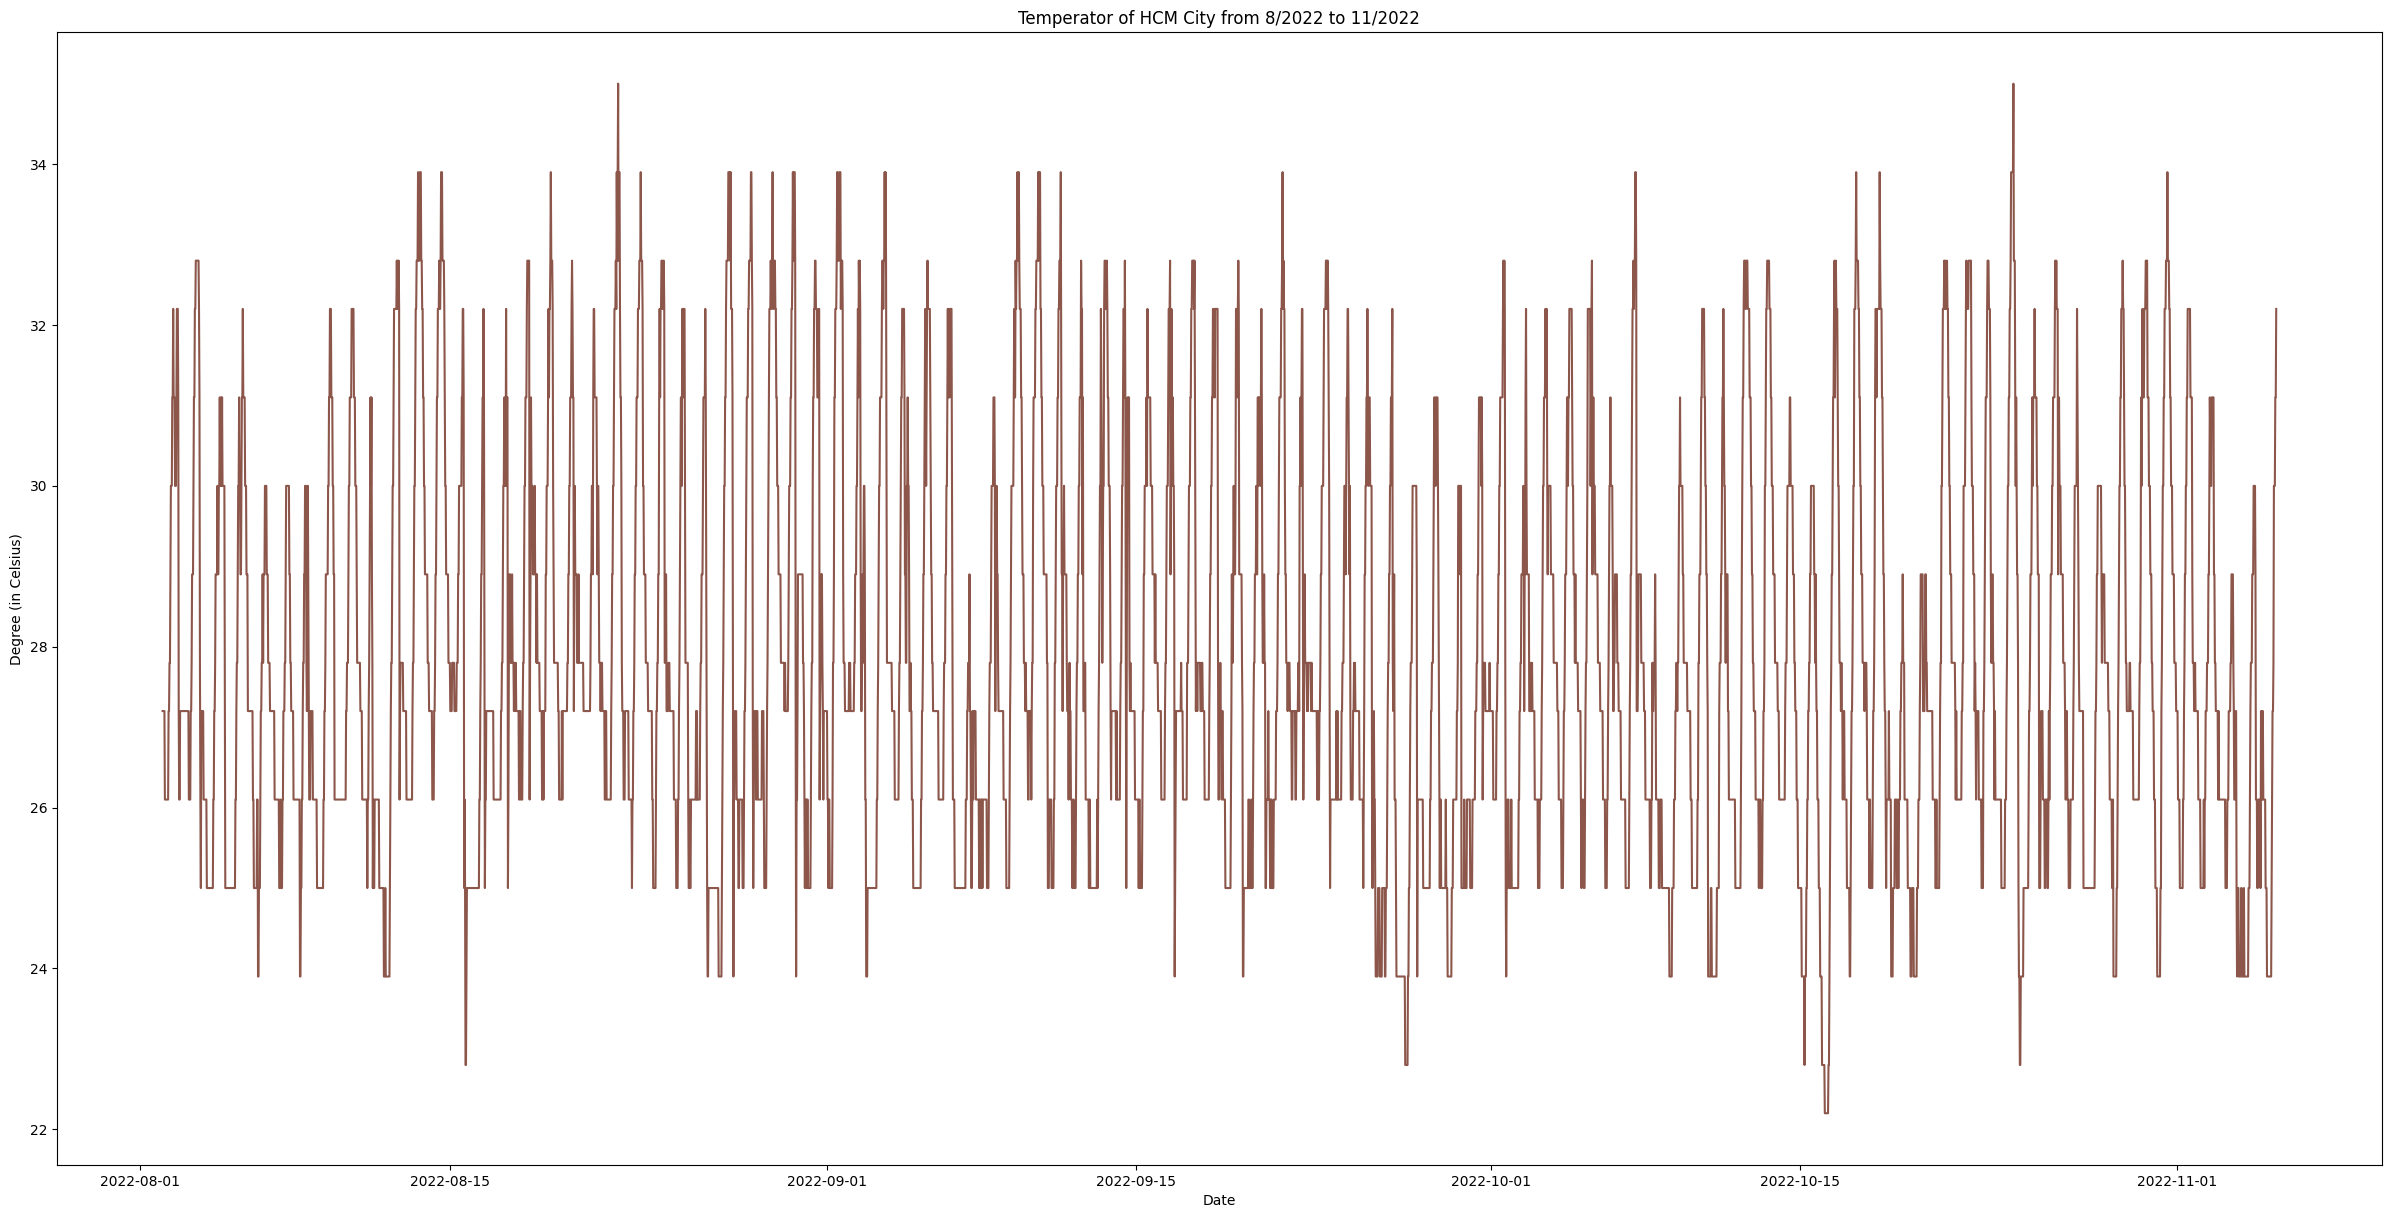

In [109]:
# tem_df["Temperature"].max()
# tem_df["Temperature"].min()
plt.figure(figsize=(30,15), dpi=100)
plt.plot(tem_df.index, tem_df.Temperature, color='tab:brown')
plt.gca().set(title="Temperator of HCM City from 8/2022 to 11/2022", xlabel='Date', ylabel="Degree (in Celsius)")
plt.show()

<AxesSubplot:xlabel='DateTime'>

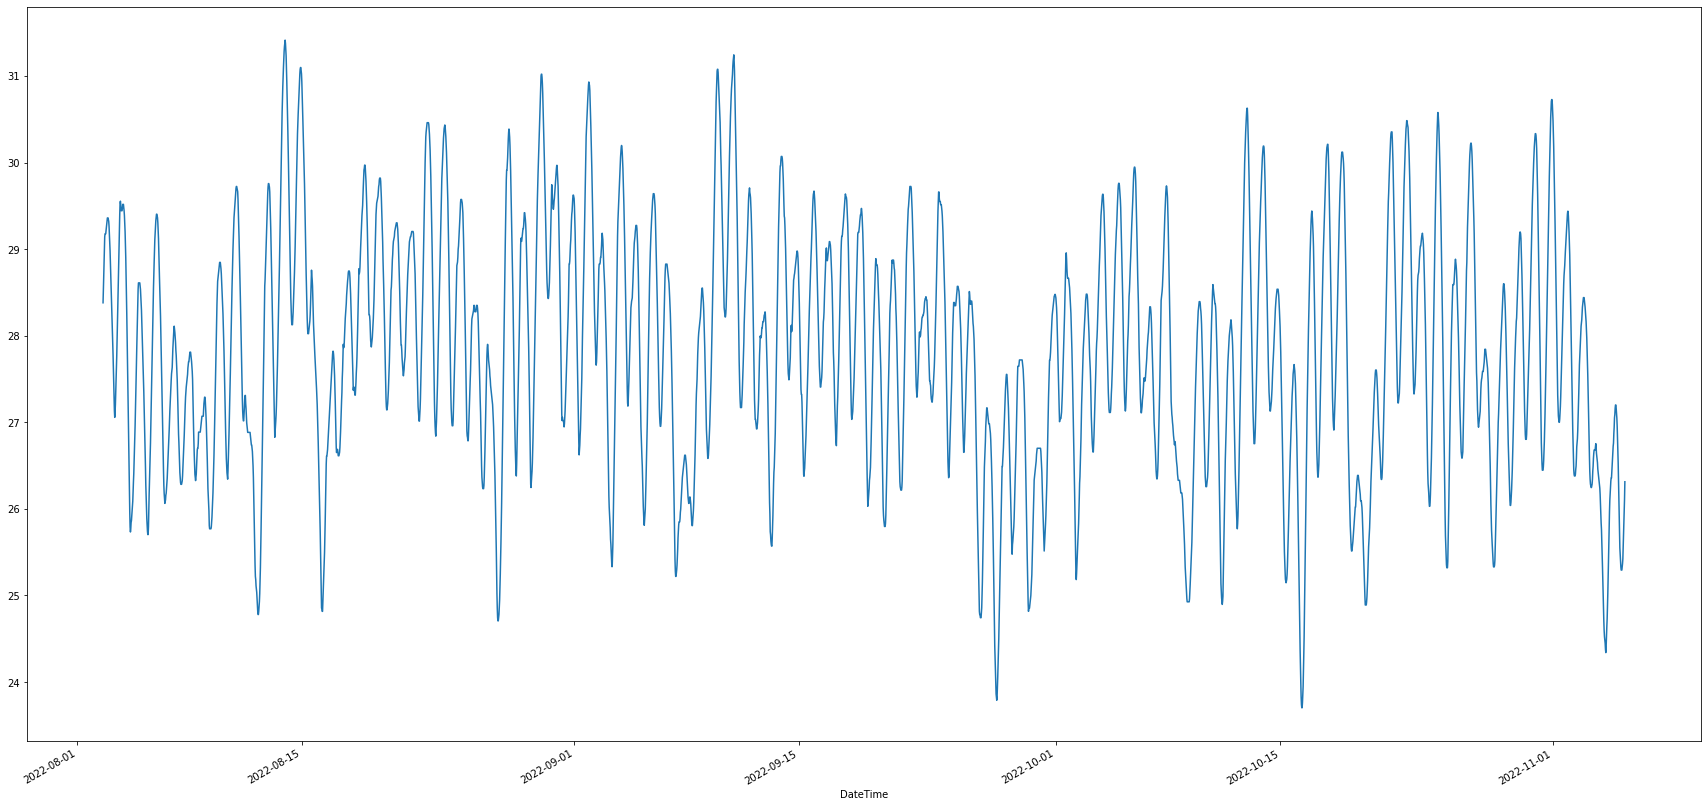

In [111]:
# Apply the Moving Average function by a subset of size 30 days.
tem_df_mean = tem_df.Temperature.rolling(window=30).mean()
tem_df_mean.plot(figsize=(30,15))

In [117]:
tem_df.squeeze()

DateTime
2022-08-02 00:00:00    27.2
2022-08-02 00:30:00    27.2
2022-08-02 01:00:00    27.2
2022-08-02 01:30:00    27.2
2022-08-02 02:00:00    27.2
                       ... 
2022-11-05 10:00:00    30.0
2022-11-05 10:30:00    30.0
2022-11-05 11:00:00    31.1
2022-11-05 11:30:00    31.1
2022-11-05 12:00:00    32.2
Name: Temperature, Length: 4578, dtype: float64

In [119]:
tem_df.Temperature

DateTime
2022-08-02 00:00:00    27.2
2022-08-02 00:30:00    27.2
2022-08-02 01:00:00    27.2
2022-08-02 01:30:00    27.2
2022-08-02 02:00:00    27.2
                       ... 
2022-11-05 10:00:00    30.0
2022-11-05 10:30:00    30.0
2022-11-05 11:00:00    31.1
2022-11-05 11:30:00    31.1
2022-11-05 12:00:00    32.2
Name: Temperature, Length: 4578, dtype: float64

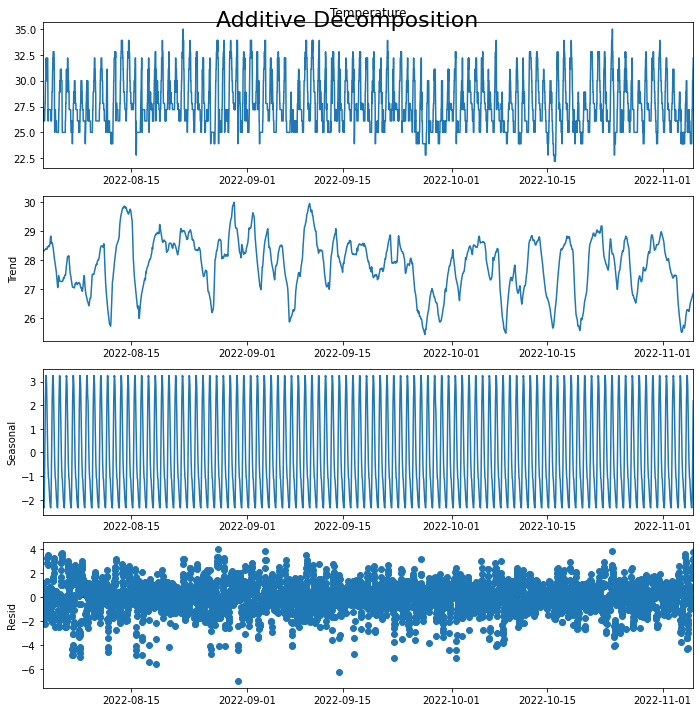

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(tem_df.Temperature, model='additive', extrapolate_trend='freq', period =48)
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=22)
plt.show()

In [ ]:
# Shift the current temperature to the next day. 
predicted_df = tem_df["Temperature"].to_frame().shift(1).rename(columns = {"Temperature": "Temperature_pred" })
actual_df = tem_df["Temperature"].to_frame().rename(columns = {"Temperature": "Temperature_actual" })

# Concatenate the actual and predicted temperature
one_step_df = pd.concat([actual_df,predicted_df],axis=1)
# Select from the second row, because there is no prediction for today due to shifting.
one_step_df = one_step_df[1:]
one_step_df.head(10)


In [142]:
one_step_df.head(20)

,Temperature_actual,Temperature_pred
DateTime,,
2022-08-02 00:30:00,27.2,27.2
2022-08-02 01:00:00,27.2,27.2
2022-08-02 01:30:00,27.2,27.2
2022-08-02 02:00:00,27.2,27.2
2022-08-02 02:30:00,26.1,27.2
2022-08-02 03:00:00,26.1,26.1
2022-08-02 03:30:00,26.1,26.1
2022-08-02 04:00:00,26.1,26.1
2022-08-02 04:30:00,26.1,26.1


In [141]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

# Calculate the RMSE
temp_pred_err = MSE(one_step_df.Temperature_actual, one_step_df.Temperature_pred, squared=False)
print("The RMSE is",temp_pred_err)

The RMSE is 0.8126969266067509


In [144]:
import itertools
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [145]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(one_step_df.T_mu_actual,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [147]:
#Fitting the model
import statsmodels.api as sm

# Fit the SARIMAX model using optimal parameters
mod = sm.tsa.statespace.SARIMAX(one_step_df.Temperature_actual,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

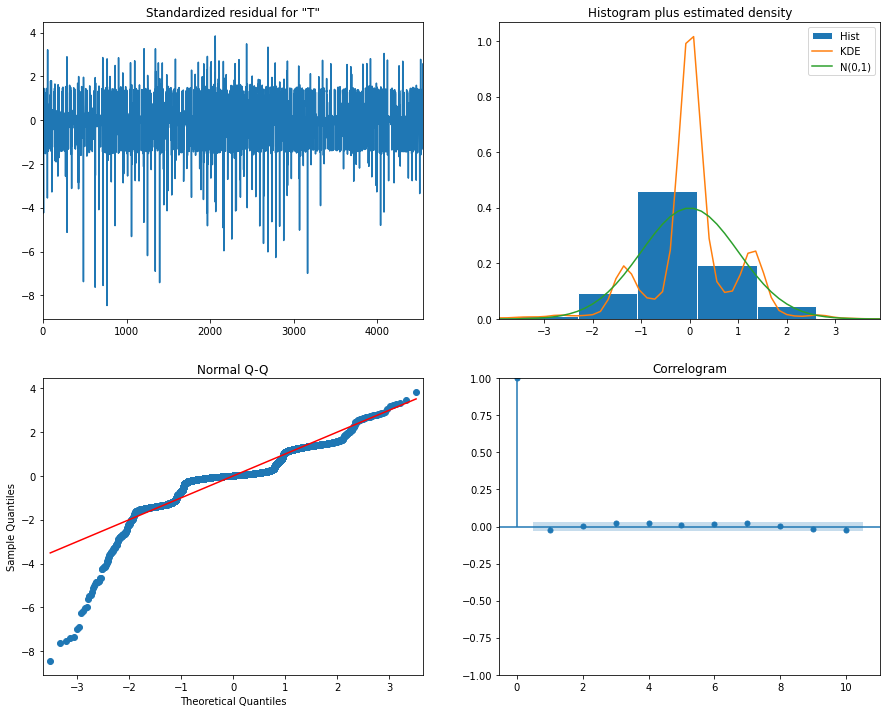

In [148]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [175]:
pred = results.get_prediction(start=pd.to_datetime('2022-10-1 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()

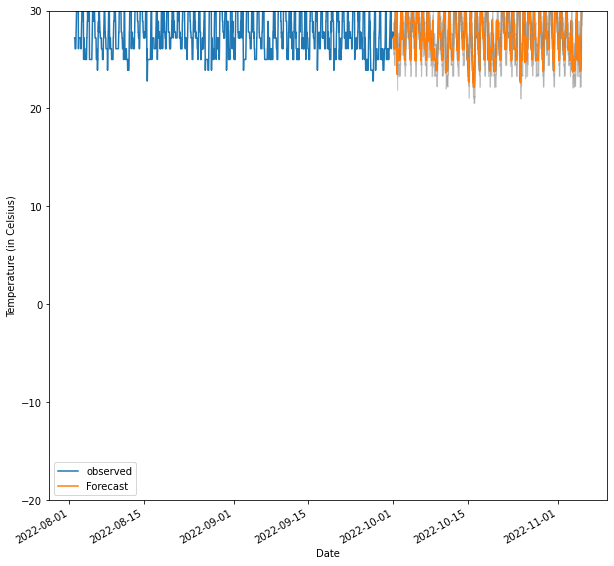

In [176]:
ax = one_step_df.Temperature_actual['2022-08-02 00:30:00':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([-20,30])
plt.legend()
plt.show()

In [177]:
y_forecasted = pred.predicted_mean
y_truth = one_step_df.Temperature_actual['2022-10-1 00:00:00':]
print(y_forecasted.shape)
print(y_truth.shape)
# Compute the mean square error
mse = MSE(y_truth, y_forecasted, squared=True)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

(1703,)
(1703,)
The Mean Squared Error of our forecasts is 0.51


In [178]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2022-10-1 00:00:00'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [179]:
pred_dynamic_ci

,lower Temperature_actual,upper Temperature_actual
DateTime,,
2022-10-01 00:00:00,25.555652,28.729400
2022-10-01 00:30:00,24.754642,29.401845
2022-10-01 01:00:00,24.148284,30.005048
2022-10-01 01:30:00,23.511889,30.436761
2022-10-01 02:00:00,23.016723,30.913355
...,...,...
2022-11-05 10:00:00,-91.145495,143.343266
2022-11-05 10:30:00,-91.157979,143.441417
2022-11-05 11:00:00,-91.169072,143.540886


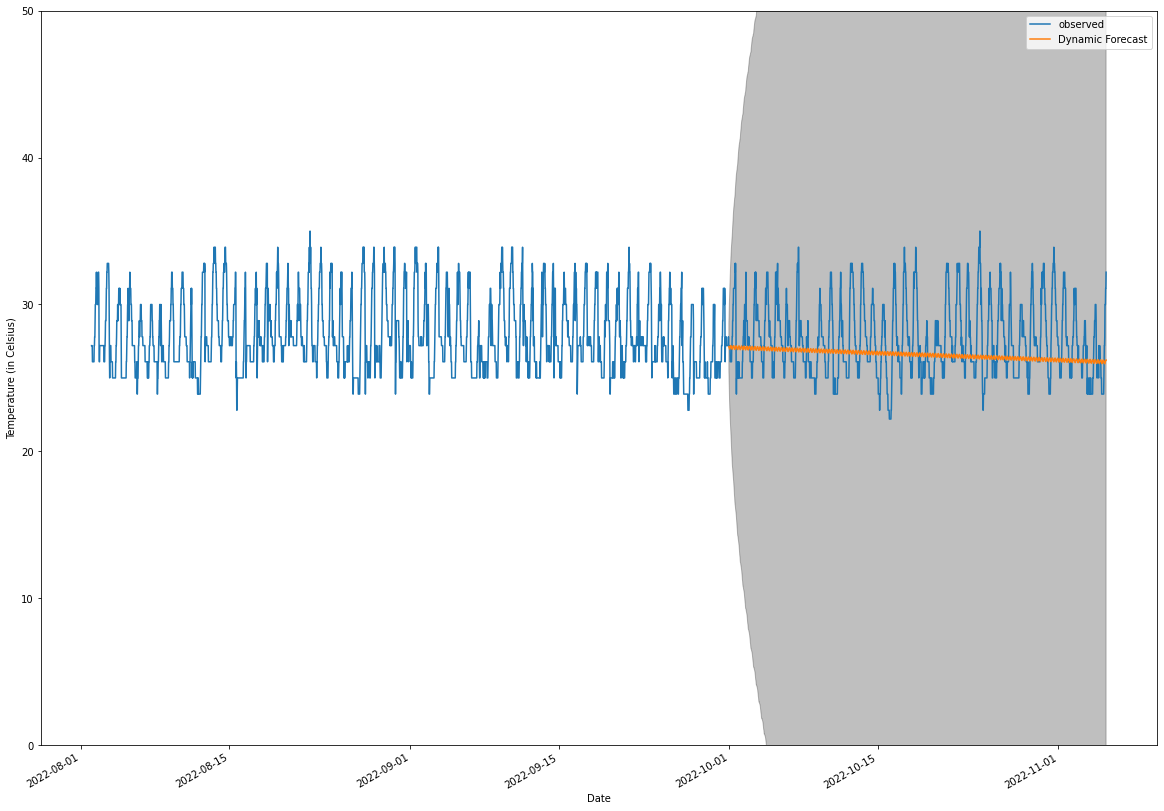

In [184]:
ax = one_step_df.Temperature_actual['2022-08-02 00:30:00':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)


ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([0,50])
plt.legend()
plt.show()

In [183]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = one_step_df.Temperature_actual['2022-10-1 00:00:00':]

# Compute the mean square error
mse = sqrt(MSE(y_truth, y_forecasted).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Root Mean Squared Error of our forecasts is 2.77
